<a href="https://colab.research.google.com/github/Yinanzhaoli/Yinan-Repository/blob/main/BE41003_CW1_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression: Question 3
--- 

Use the function that you have implemented in the previous questions to perform a $L_2$ regularized linear regression on the dataset provided.

The following section loads the diabetes data: you can find the description of the data as output of the print() function

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

The data is split into training data and testing data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],diabetes['target'], random_state=2005)
y = np.reshape(y_train, (y_train.shape[0], 1))
X = X_train
m = y.size

## TRAINING

We aim to run the $L_2$ regularized linear regression to find the optimal parameters $\bf \theta$ of the model.

In [ ]:
y = np.reshape(y_train, (y_train.shape[0], 1))
X = X_train
m = y.size

TODO: Insert the column of 1's into the features matrix $\bf X$

In [ ]:
#Insert the usual column of 1's into the "X" matrix
# YOUR CODE HERE
X = np.insert(X, 0, 1, axis = 1)

TODO: Plot the data $\bf y$ respect to the average blood pressure

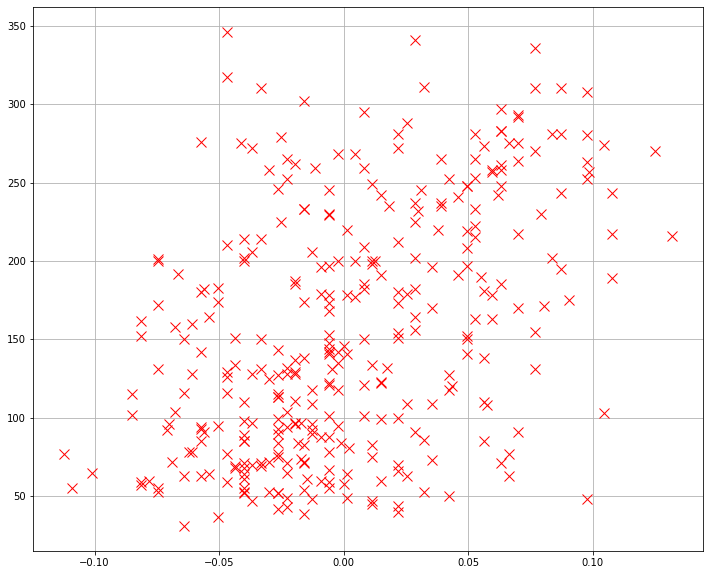

In [ ]:
# Plot y respect to the average blood pressure
# YOUR CODE HERE
plt.figure(figsize = (12, 10))
plt.plot(X[:, 4], y[:, 0], 'rx', markersize = 10)
plt.grid(True)

TODO: Write the Python function (from Question 1) to calculate the $L_2$ regularized least square cost function.

In [ ]:
# function that computes the L2 regularized least square loss
# YOUR CODE HERE
lam = 0.1
def h(w, X):
  return np.dot(X, w)

def compute_cost(w, X, y, lam = lam):
  return float(1. / (m * 2) * np.dot((h(w, X) - y).T, (h(w, X) - y)) + 0.5 * lam * np.sum(np.power(w, 2)))

In [ ]:
# direct solution
def direct_solution(X, y, la = 0.1):
  t = np.dot(X.T, X)
  return np.dot(np.linalg.inv(t + la * np.identity(t.shape[0])), np.dot(X.T, y))

TODO: Write the Python function (from Question 2) to implement the Gradient Descent algorithm to minimize the $L_2$ regularized least square cost function.

In [ ]:
# Gradient descent minimizing algorithm
# YOUR CODE HERE
iterations = 1700
alpha = 0.01
def descend_gradient(X, theta_start = np.zeros(2)):
    theta = theta_start
    jvec = []
    thetahistory = []
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(compute_cost(theta, X, y))
        thetahistory.append(list(theta[:, 0]))
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha / m) * np.sum((h(theta, X) - y) * np.array(X[:, j]).reshape(m, 1))
        theta = tmptheta
    return theta, thetahistory, jvec

TODO: Select a set of initial values for $\bf w$, the number of iterations, the learning rate, the regularization parameter and run the Gradient descent algorithm. 

Plot the convergence of the cost function.

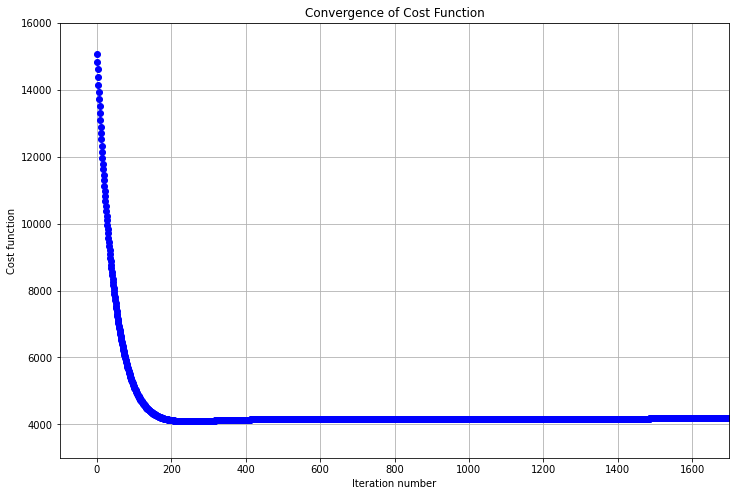

In [ ]:
# Run gradient descent to get the theta values and plot the convergence result
# YOUR CODE HERE
theta_start = np.zeros((X.shape[1], 1))
theta, thetahistory, jvec = descend_gradient(X, theta_start)

def plot_convergence(jvec):
  plt.figure(figsize = (12, 8))
  plt.plot(range(len(jvec)), jvec, 'bo')
  plt.title("Convergence of Cost Function")
  plt.xlabel("Iteration number")
  plt.ylabel("Cost function")
  plt.xlim([-100, 1700])
  plt.ylim([3000, 16000])
  plt.grid(True)

plot_convergence(jvec)

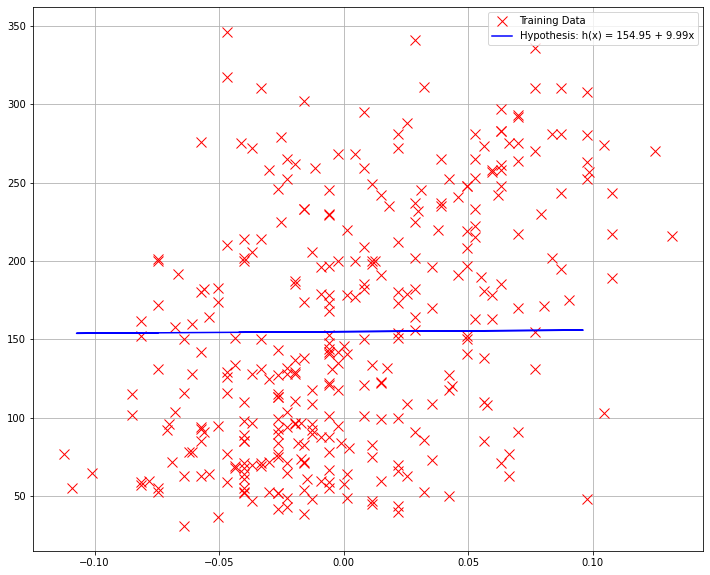

In [ ]:
def myfit(x):
  return theta[0] + theta[1] * x
plt.figure(figsize=(12, 10))
plt.plot(X[:, 4], y[:, 0], 'rx', markersize = 10, label = 'Training Data')
plt.plot(X[:, 1], myfit(X[:, 1]), 'b-', label = 'Hypothesis: h(x) = %0.2f + %0.2fx' % (theta[0], theta[1]))
plt.grid(True)
plt.legend()

TODO: Run the Gradient Descent using different values of the regularization parameter. Does it affect the convergence plot?

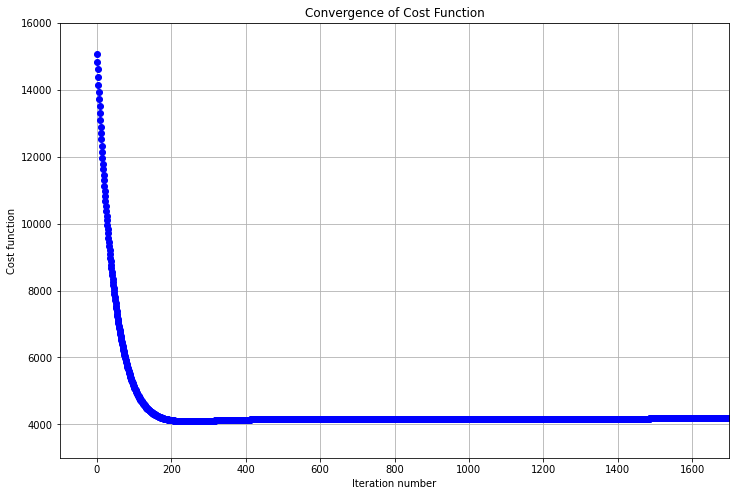

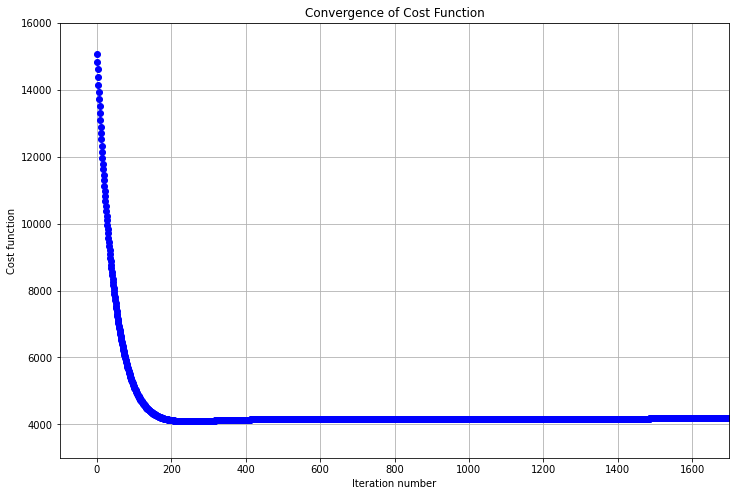

In [ ]:
# Run gradient descent with different regularization parameter and plo the convergence results.
# YOUR CODE HERE
lam = 0.5
plot_convergence(jvec)

lam = 1
plot_convergence(jvec)

## TESTING

Using the $\bf w$ model parameters obtained before, evaluate the mean square error error between $\bf y = X_{test} \cdot \bf w$ and $\bf y_{test}$ from the dataset. 

In [ ]:
# Testing error 
X_test = np.insert(X_test,0,1,axis=1)
# YOUR CODE HERE
def mse(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.square(np.subtract(actual, pred)).mean()

print(mse(np.dot(X_test, theta), np.reshape(y_test, (y_test.shape[0], 1))))

4954.730982714673
